# Salient synchronous machine
Jupyter notebook for the simulation of a salient synchronous machine.

This notebook is an additional file to exercise 06.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import ode
from scipy.integrate import odeint

# plot configurations
cm = 1/2.54 # centimeters in inches

# define colors
blue = np.array([0.000, 0.447, 0.741])
red = np.array([0.850, 0.325, 0.098])
yellow = np.array([0.929, 0.694, 0.125])
purple = np.array([0.494, 0.184, 0.556])
green = np.array([0.466, 0.674, 0.188])
lblue = np.array([0.301, 0.745, 0.933])
dred = np.array([0.635, 0.078, 0.184])

In [2]:
## machine parameter

R_s = 0.0166    # ohm
R_f = 54.7      # ohm
L_d = 2.7e-3    # H
L_q = 1.3e-3    # H
L_f = 20.3      # H
M_fs = 92.8e-3  # H


# assumption
p = 2
J = 0.02

gamma = M_fs**2-L_d*L_f

In [3]:
## simulation configuration

# time vector
t = np.linspace(0,0.5,10**3)

## short circuit
u_sd = 0 # V
u_sq = 0 # V

# field winding
u_f = 0 # V

## ODE

In [4]:
omegaConst = False

def odes(x,t):
    # states
    i_sd = x[0]
    i_sq = x[1]
    i_f = x[2]
    omega = x[3]
    angle = x[4]


    # matrix calculation
    L = np.array([[L_d,0,M_fs],[0,L_q,0],[M_fs,0,L_f]])

    inf_L = np.array([[-L_f/gamma, 0, M_fs/gamma],[0, 1/L_q, 0],[M_fs/gamma, 0, -L_d/gamma]])
    u = np.array([[u_sd],[u_sq],[u_f]])
    R = np.array([[R_s, 0, 0],[0, R_s, 0],[0,0,R_f]])
    i = np.array([[x[0]],[x[1]],[x[2]]])
    omega_m = np.array([[0,-omega,0],[omega,0,0],[0,0,0]])

    psi = np.matmul(L,i)


    d_x_dt = np.matmul(inf_L,(u-np.matmul(R,i) - np.matmul(omega_m,psi)))

    d_i_sd_dt = d_x_dt[0]
    d_i_sq_dt = d_x_dt[1]
    d_i_f_dt = d_x_dt[2]


    if omegaConst:
        d_omega_dt = 1
        # torque
        T = (3/2*p*(M_fs*i_f*i_sq + (L_d-L_q)*i_sq*i_sd))
    else:
        # mechanical
        d_omega_dt = p/J *(3/2*p*(M_fs*i_f*i_sq + (L_d-L_q)*i_sq*i_sd) - 0.0001*omega**2)

    # angle
    d_angle_dt = omega

    return[d_i_sd_dt,d_i_sq_dt,d_i_f_dt,d_omega_dt,d_angle_dt]
    

In [8]:
# set the initial conditions
i_sd0 = 0
i_sq0 = 0
i_f0 = 7.854 # A
omega_M0 = 200/p*2*np.pi
epsilon_M0 = 0

x0 = [i_sd0,i_sq0,i_f0,omega_M0,epsilon_M0]

## solve ODE
x = odeint(odes,x0,t)

i_d = x[:,0]
i_q = x[:,1]
i_f = x[:,2]
omega = x[:,3]
angle = x[:,4]

# torque
T = 3/2*p*(M_fs*i_f*i_q + (L_d-L_q)*i_q*i_d)

### Analytical solution
Calculation of the analytical solution. A detailed derivation of the equations is given in the solution of ex06.

In [9]:
if omegaConst:
    i_d_analytical = (-L_f*M_fs*(np.cos(t*omega)-1)/gamma)*i_f0
    i_q_analytical = (-M_fs*np.sin(t*omega)/L_q)*i_f0
    i_f_analytical = ((M_fs**2*np.cos(t*omega)-L_d*L_f)/gamma)*i_f0
else:
    print('No analytical solution available.')

No analytical solution available.


### Plot the solution

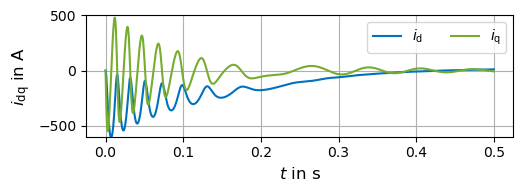

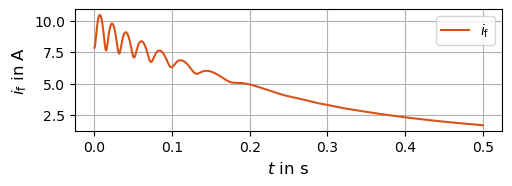

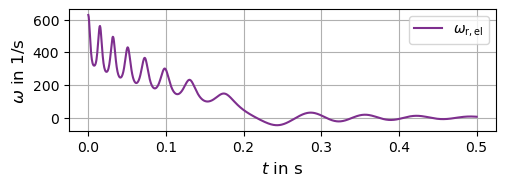

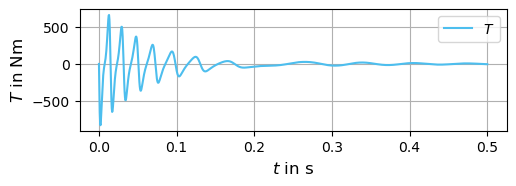

In [10]:
savePlot = False

if omegaConst:
    ## i_dq
    fig1,axs1 = plt.subplots(1,1,figsize=(14*cm,4*cm))
    axs1.plot(t,i_d,label=r'$i_{\mathrm{d}}$',color=blue)
    axs1.plot(t,i_q,label=r'$i_{\mathrm{q}}$',color=green)
    axs1.plot(t,i_d_analytical,label=r'$i_{\mathrm{d,analytical}}$',linestyle='--',color=blue)
    axs1.plot(t,i_q_analytical,label=r'$i_{\mathrm{q,analytical}}$',linestyle='--',color=green)
    axs1.legend(loc='best',ncols=4)
    axs1.grid(True)
    axs1.set_ylabel(r'$i_{\mathrm{dq}}$ in A',fontsize=12)
    axs1.set_xlabel(r'$t$ in s',fontsize=12)
    axs1.set_xlim(0,0.05)
    axs1.set_ylim(-700,1200)

    ## i_f
    fig2,axs2 = plt.subplots(1,1,figsize=(14*cm,4*cm))
    axs2.plot(t,i_f,label=r'$i_{\mathrm{f}}$',color=red)
    axs2.plot(t,i_f_analytical,label=r'$i_{\mathrm{f,analytical}}$',color=red,linestyle='--')
    axs2.legend(loc='best',ncols=2)
    axs2.grid(True)
    axs2.set_ylabel(r'$i_{\mathrm{f}}$ in A',fontsize=12)
    axs2.set_xlabel(r'$t$ in s',fontsize=12)
    axs2.set_xlim(0,0.05)
else:
    ## i_dq
    fig10,axs10 = plt.subplots(1,1,figsize=(14*cm,4*cm))
    axs10.plot(t,i_d,label=r'$i_{\mathrm{d}}$',color=blue)
    axs10.plot(t,i_q,label=r'$i_{\mathrm{q}}$',color=green)
    axs10.legend(loc='best',ncols=4)
    axs10.grid(True)
    axs10.set_ylabel(r'$i_{\mathrm{dq}}$ in A',fontsize=12)
    axs10.set_xlabel(r'$t$ in s',fontsize=12)
    axs10.set_ylim(-600,500)

    ## i_f
    fig20,axs20 = plt.subplots(1,1,figsize=(14*cm,4*cm))
    axs20.plot(t,i_f,label=r'$i_{\mathrm{f}}$',color=red)
    axs20.legend(loc='best',ncols=2)
    axs20.grid(True)
    axs20.set_ylabel(r'$i_{\mathrm{f}}$ in A',fontsize=12)
    axs20.set_xlabel(r'$t$ in s',fontsize=12)


# omega
fig4,axs4 = plt.subplots(1,1,figsize=(14*cm,4*cm))
axs4.plot(t,omega,label=r'$\omega_{\mathrm{r,el}}$',color=purple)
axs4.grid(True)
axs4.legend(loc='best',ncols=2)
axs4.set_ylabel(r'$\omega$ in 1/s',fontsize=12)
axs4.set_xlabel(r'$t$ in s',fontsize=12)

# torque
fig6,axs6 = plt.subplots(1,1,figsize=(14*cm,4*cm))
axs6.plot(t,T,label=r'$T$',color=lblue)
axs6.grid(True)
axs6.legend(loc='upper right',ncols=2)
axs6.set_ylabel(r'$T$ in Nm',fontsize=12)
axs6.set_xlabel(r'$t$ in s',fontsize=12)

if omegaConst:
    if savePlot:
        fig1.savefig('C:/Git/EMD_Course/exercise/fig/ex06/i_dq_omega_const_analytical_ode.pdf',bbox_inches='tight')
        fig2.savefig('C:/Git/EMD_Course/exercise/fig/ex06/i_f_omega_const_analytical_ode.pdf',bbox_inches='tight')
    else:
        print('No plots saved')
else:
    if savePlot:
        fig10.savefig('C:/Git/EMD_Course/exercise/fig/ex06/i_dq_ode.pdf',bbox_inches='tight')
        fig20.savefig('C:/Git/EMD_Course/exercise/fig/ex06/i_f_ode.pdf',bbox_inches='tight')
        fig4.savefig('C:/Git/EMD_Course/exercise/fig/ex06/omega_r_el_ode.pdf',bbox_inches='tight')
        fig6.savefig('C:/Git/EMD_Course/exercise/fig/ex06/T_ode.pdf',bbox_inches='tight')